# Wprowadzenie do Deep Learning

Deep learning czerpie inspirację z biologii, ale działa dzięki matematyce,
statystyce i szybkim obliczeniom numerycznym. Poniżej znajdziesz krótki
przegląd podstaw, od pojedynczego neuronu po cały proces uczenia się sieci.

## Neuron

### Neuron w biologii

Neuron biologiczny składa się z dendrytów odbierających sygnał, ciała
komórkowego (soma), które go przetwarza, oraz aksonu przesyłającego impuls
do kolejnych komórek. Połączenia synaptyczne modulują siłę przekazywanego
sygnału (potencjał postsynaptyczny), co pozwala mózgowi adaptować się i
uczyć na podstawie doświadczeń.


<figure style="text-align: center;">
  <img src="../_img/neuron.png" width="400">
  <figcaption>Uproszczona budowa neuronu</figcaption>
</figure>



### Neuron w informatyce

Sztuczny neuron modeluje działanie neuronu biologicznego poprzez ważoną sumę
wejść i funkcję aktywacji. Dla wektora wejściowego `x` i wag `w` możemy to opisać równaniem:

$$
z = w \cdot x + b
$$

gdzie:

* $z$ – to łączna pobudka (**potencjał**) neuronu, czyli suma ważona wejść plus bias.
  Jest to wartość przed zastosowaniem funkcji aktywacji. $z$ można traktować jako „surowy sygnał”, który jeszcze musi przejść przez nieliniowość, aby neuron wydał ostateczną odpowiedź (np. „aktywny” lub „nieaktywny”).

* $w$ – to **wektor wag** przypisanych do wejść, określających, jak silny wpływ ma dana cecha na wynik neuronu:
$$
w = [w_1, w_2, \dots, w_n]
$$

* $x$ – to **wektor wejściowy** neuronu, czyli zestaw sygnałów (cech) wchodzących do neuronu.
  * Przykład: dla obrazu każdy piksel może być jedną cechą wejściową, dla danych tabelarycznych cechami mogą być kolumny (wiek, dochód, lokalizacja).
  * Jeśli neuron ma wiele wejść, `x` zapisujemy jako wektor:
$$
x = [x_1, x_2, \dots, x_n]
$$

* $b$ to **Bias** działa jak wyraz wolny w równaniu liniowym i pozwala przesunąć punkt aktywacji (próg pobudzenia).


Następnie przepuszczamy wynik przez nieliniową **funkcję aktywacji**. Możemy to zobrazować na poniższym schemacie:

<figure style="text-align: center;">
    
```mermaid
flowchart LR
    x1["x₁"] -->|w₁| N["z = w·x + b"]
    x2["x₂"] -->|w₂| N
    x3["x₃"] -->|w₃| N
    b["bias b"] --> N
    N -->|z| A["σ(z) - Funkcja aktywacji"]
    A --> y["Wyjście a"]

    style N fill:#fff,stroke:#000,stroke-width:2px
    style A fill:#f9f,stroke:#000,stroke-width:2px
```

<figcaption>Schemat działnia neuronu</figcaption>
</figure>


* **Funkcja aktywacji** wprowadza nieliniowość, dzięki której sieć może uczyć się złożonych zależności, a nie tylko prostych kombinacji liniowych. Bez niej sieć neuronowa byłaby równoważna pojedynczej regresji liniowej – niezależnie od liczby warstw.

* **Najpopularniejsze funkcje aktywacji**:

  * **Sigmoida**:
    $$
    \sigma(z) = \frac{1}{1+e^{-z}}
    $$
    ściska wartości do przedziału (0,1). Dobrze nadaje się do modelowania prawdopodobieństwa, ale cierpi na problem „zanikającego gradientu” przy dużych wartościach dodatnich i ujemnych.

  * **tanh**:
    $$
    \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
    $$
    wartości w przedziale (-1, 1). Zwykle lepsza niż sigmoida, bo ma wartości znormalizowane wokół zera, co ułatwia uczenie.

  * **ReLU (Rectified Linear Unit)**:
    $$
    \text{ReLU}(z) = \max(0, z)
    $$
    najczęściej używana we współczesnych sieciach, prosta i skuteczna, ale może powodować „martwe neurony” (jeśli gradient zeruje się dla wartości < 0).

  * **Leaky ReLU / ELU / GELU** – modyfikacje ReLU, które rozwiązują część problemów, np. martwych neuronów.

* **Wybór funkcji aktywacji** zależy od kontekstu:

  * w warstwach ukrytych najczęściej stosuje się **ReLU lub jej odmiany**,
  * w warstwie wyjściowej stosuje się funkcję dopasowaną do zadania, np.

    * **sigmoidę** przy klasyfikacji binarnej,
    * **softmax** przy klasyfikacji wieloklasowej,
    * brak funkcji aktywacji (warstwa liniowa) przy regresji.




## Perceptron

Opisany przez Rosenblatta w 1958 roku to pojedyńczy neuron z wagami i biasem oraz funkcj aktyuwacji progowej

Używany do rozwiązywania prostych problemów klasyfikacyjnych liniowo separowalnych.

### Przykład intuicyjny (2D):

Mamy punkty należące do klasy A (np. oznaczone jako niebieskie kółka) i klasy B (np. czerwone krzyżyki).

Jeśli da się narysować prostą linię tak, że wszystkie niebieskie kółka są po jednej stronie, a wszystkie czerwone krzyżyki po drugiej — to problem jest liniowo separowalny.

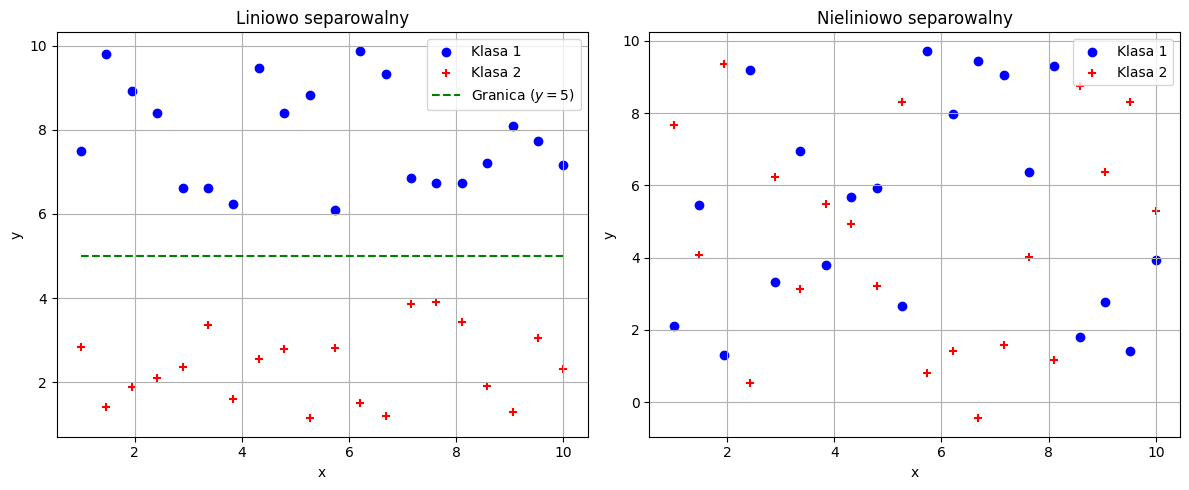

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# --- wspólne x ---
x = np.linspace(1, 10, 20)

# --- 1. Separowalny ---
y1 = np.random.uniform(6, 10, size=len(x))   # klasa 1 wysoko
y2 = np.random.uniform(1, 4, size=len(x))    # klasa 2 nisko

# --- 2. Nieseparowalny ---
y1_nl = np.random.uniform(1, 10, size=len(x))   # losowe punkty
mask = y1_nl > 5                                # klasyfikacja wg progu
y2_nl = 10 - y1_nl + np.random.uniform(-1, 1, size=len(x))  # odbicie + szum

# --- Rysowanie ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (a) Separowalny
axes[0].scatter(x, y1, label="Klasa 1", color="blue", marker="o")
axes[0].scatter(x, y2, label="Klasa 2", color="red", marker="+")
axes[0].plot([1, 10], [5, 5], "g--", label="Granica ($y=5$)")
axes[0].set_title("Liniowo separowalny")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# (b) Nieseparowalny
axes[1].scatter(x, y1_nl, label="Klasa 1", color="blue", marker="o")
axes[1].scatter(x, y2_nl, label="Klasa 2", color="red", marker="+")
axes[1].set_title("Nieliniowo separowalny")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



Formalnie dla perceptrony mamy:

$$
z = w \cdot x + b
$$

$$
y = f(z)
$$

gdzie $f(z)$ to jakaś nieliniowa funkcja. Np:

$$
f(z) = \begin{cases}
1 & \text{gdy } z \geq 0 \\
0 & \text{gdy } z < 0
\end{cases}
$$


W dalszej części wykorzystamy Perceptronową sieć do tego by przedstawić kilka koncepcji związanych z uczeniem maszynowym. 



## Sieć neuronowa

Sieć neuronowa to złożenie wielu neuronów ułożonych w warstwy.

* **Warstwa wejściowa** odbiera dane.
* **Warstwy ukryte** tworzą coraz bardziej abstrakcyjne reprezentacje.
* **Warstwa wyjściowa** generuje prognozę (klasę, wartość liczbową, wektor cech).

<figure style="text-align: center;">
  <img src="../_img/siec_neuronowa.svg" width="400">
  <figcaption>Uproszczony schemat prostej jednokierunkowej, gęstej sieci neuronowej. Od lewej warstwa wejściowa, warstwa ukryta, warstwa wyjściowa</figcaption>
</figure>


W praktyce wykorzystujemy różne architektury, zależnie od problemu:

* **Single-Layer Perceptron (SLP)**
  * Sieć, w której jest tylko **jedna warstwa wyjściowa** z perceptronów.
  * Może mieć wiele neuronów, ale nadal działa tylko liniowo + próg.
  * Ograniczenie: nie rozwiązuje problemów nieliniowych (np. XOR).

* **MLP (Multilayer Perceptron)** – uniwersalna sieć gęsto połączona
  * To już **wielowarstwowa gęsta sieć neuronowa**, czyli kilka warstw perceptronów (dzisiaj z nieliniowymi aktywacjami: sigmoid, ReLU itp.).
  * Dzięki warstwom ukrytym może uczyć się nieliniowych zależności.
  * W praktyce, gdy mówimy „**gęsta sieć neuronowa**” – często mamy na myśli właśnie MLP.
  * MLP są **uniwersalnymi aproksymatorami** – oznacza to, że przy odpowiedniej liczbie neuronów i warstw mogą odwzorować dowolną funkcję ciągłą z zadaną dokładnością.

* **Sparsely Connected Networks**
  * Sieci o rzadkich połączeniach – nie każdy neuron łączy się z każdym kolejnym.
  * Dzięki temu liczba wag jest mniejsza, co redukuje koszty obliczeniowe.
  * W praktyce wiele nowoczesnych sieci stosuje takie podejście.

* **CNN (Convolutional Neural Network)**
  * Świetne do obrazów i danych o strukturze przestrzennej.
  * Każdy neuron „widzi” tylko fragment wejścia (tzw. receptive field).
  * To przykład niegęstych połączeń – np. filtr 3×3 nie łączy się ze wszystkimi pikselami obrazu, tylko z małym obszarem.
  * Często zawierają też warstwy pooling, które zmniejszają rozdzielczość i ułatwiają wychwytywanie istotnych cech.

* **RNN (Recurrent Neural Network)**
  * Idea: sieć „zapętla się w czasie” – wynik z poprzedniego kroku jest podawany jako wejście do kolejnego.
  * Zaleta: prosta koncepcja, dobrze nadaje się do krótkich sekwencji.
  * Problem: *zanikający/explodujący gradient* – im dłuższa sekwencja, tym trudniej uczyć zależności odległych w czasie.
  * Zastosowania: krótkie sekwencje, proste modele językowe (ale dziś rzadko używane samodzielnie).

* **LSTM (Long Short-Term Memory)**
  * Rozwinięcie RNN wprowadzone przez Hochreitera i Schmidhubera (1997).
  * Kluczowa innowacja: komórka pamięci + bramki (input, forget, output), które sterują tym, co zapamiętać, co zapomnieć i co przekazać dalej.
  * Zaleta: potrafi przechowywać informacje przez długie odcinki sekwencji → radzi sobie z problemem zanikającego gradientu.
  * Zastosowania: analiza języka, tłumaczenie maszynowe, modele czasowe (prognozowanie szeregów).

* **GRU (Gated Recurrent Unit)**
  * Powstała później (2014) jako uproszczenie LSTM.
  * Mniej bramek (update gate, reset gate) → mniej parametrów niż LSTM, szybsze trenowanie.
  * Często daje podobną jakość jak LSTM, ale jest prostsza obliczeniowo.
  * Zastosowania: podobne do LSTM, często używana tam, gdzie liczy się szybkość.

* **Transformery**
  * Obecnie dominujące w NLP (przetwarzanie języka naturalnego) i coraz częściej w wizji komputerowej.
  * Używają mechanizmu attention, który nie jest pełnym połączeniem warstw w klasycznym sensie, tylko ważonym dostępem do wybranych elementów sekwencji.
  * Transformery zastąpiły RNN w NLP, bo lepiej radzą sobie z długimi zależnościami w sekwencjach.

---

## Jak działa i uczy się perceptron — najprostszy przypadek

### 1. Propagacja w przód (*forward propagation*)

Dla danego wektora wejściowego $ x = (x_1, x_2, \dots, x_n) $ obliczamy wartość liniową:

$$
z = w \cdot x + b = \sum_i w_i x_i + b
$$

gdzie:

* $ w_i $ — waga przy wejściu $x_i$,
* $ b $ — bias (przesunięcie).

Na tę sumę nakładamy **funkcję aktywacji**.
W klasycznym perceptronie jest to funkcja progowa (*unit step*):

$$
\hat{y} =
\begin{cases}
1 & \text{jeśli } z \ge 0 \\
0 & \text{jeśli } z < 0
\end{cases}
$$

Wynik $\hat{y}$ to przewidywana etykieta klasy.

---

### 2. Porównanie z prawdziwą etykietą

Sprawdzamy, czy przewidywanie $\hat{y}$ zgadza się z wartością rzeczywistą $y$:

* jeśli tak — nie zmieniamy wag,
* jeśli nie — musimy je skorygować.

---

### 3. Korekcja błędów (aktualizacja wag)

Definiujemy **błąd klasyfikacji**:

$$
e = y - \hat{y}
$$

Jeżeli $e \neq 0$, modyfikujemy wagi według reguły:

$$
w \leftarrow w + \eta \cdot e \cdot x
$$

$$
b \leftarrow b + \eta \cdot e
$$

gdzie $\eta$ to współczynnik uczenia (*learning rate*).

**Intuicja**:

* Jeśli perceptron źle zaklasyfikował próbkę, przesuwamy granicę decyzyjną w jej stronę.
* Dzięki temu zwiększamy szansę, że następnym razem będzie poprawnie.

**Przykład**:

Załóżmy:

* wejście: $x = (2, 3)$,
* wyjście to: 1
* wagi: $w = (0.5, -1)$,
* bias $b = 0$,
* nieliniowość to funkcja progowa

$$
z = w \cdot x + b 
$$

$$
z = (0.5, -1) \cdot (2, 3) + 0 = 0.5 \cdot 2 + (-1) \cdot 3 = 1 - 3 = -2
$$

$$
\hat{y} = 0
$$


$$
e = y - \hat{y} = 1 - 0 = 1
$$

(czyli perceptron przewidział 0, a powinien 1).

* $\eta = 0.1$,

Aktualizacja:

$$
w \leftarrow (0.5, -1) + 0.1 \cdot 1 \cdot (2, 3) = (0.5, -1) + (0.2, 0.3) = (0.5+0.2, -1+0.3) = (0.7, -0.7)
$$

Czyli **obie wagi zostały podniesione**, bo chcemy „przesunąć” granicę decyzyjną w stronę tej próbki.

Sprawdźmy więc:

$$
z = (0.7, 0.7) \cdot (2, 3) + 0 = 0.7 \cdot 2 + 0.7 \cdot 3 = 1.4 + 2.1 = 3.5
$$

$$
\hat{y} = 1
$$


---

### 4. Iteracja w epokach

Proces przedstawiony powyżej stosujemy dla każdego przykłądu uczącego (dla wszystkich danych). Jedno takie przejście to tzw. epoka (ang. _epoch_)

Powtarzamy ten proces wielokrotnie. 

* Jeśli dane są **liniowo separowalne**, perceptron **zawsze** znajdzie hiperpłaszczyznę, która poprawnie rozdziela klasy.
* Jeśli nie — proces będzie się wahał i nigdy nie dojdzie do pełnego rozwiązania.

## Prosty przykład - implementacja klasyfikatora opartego o model Perceptronu

Załóżmy, że mamy dane dotyczące owoców – ich **masy** i **średnicy**.

| Masa | Średnica | Owoc       |
| ---- | -------- | ---------- |
| 130  | 7        | jabłko     |
| 150  | 8        | jabłko     |
| 110  | 7        | pomarańcza |
| 90   | 6        | pomarańcza |
| ...  | ...      | ...        |

Spróbujmy zamodelować perceptron, który będzie klasyfikatorem uczącym się na podstawie tych danych, aby rozróżniać jabłka od pomarańczy.

W naszych danych **Masa** i **Średnica** to **cechy (features)** – zmienne niezależne opisujące obiekt.
Na ich podstawie model będzie decydował, czy dany owoc to jabłko, czy pomarańcza.

**Owoc** to **etykieta (label)** – zmienna zależna, którą chcemy przewidywać.

Dane są już przygotowane i podzielone na zestaw uczący (`X_train`, `y_train`) oraz testowy (`X_test`, `y_test`).

* Duże **X** oznacza, że mamy do czynienia z wieloma cechami – każdy owoc reprezentuje wektor cech niezależnych.
* Małe **y** oznacza wartości etykiet – w tym przypadku pojedynczą wartość (skalarną) przypisaną do każdego przykładu.


In [3]:
import numpy as np

# Dane treningowe: [masa, średnica]
X_train = np.array([
    [130.0, 7.0],   # jabłko
    [150.0, 8.0],   # jabłko
    [180.0, 8.5],   # jabłko
    [90.0, 6.0],    # pomarańcza
    [100.0, 6.5],   # pomarańcza
    [110.0, 7.0],   # pomarańcza
    [131.0, 7.3],   # jabłko
    [152.0, 8.1],   # jabłko
    [179.0, 8.3],   # jabłko
    [92.0, 6.1],    # pomarańcza
    [101.0, 6.5],   # pomarańcza
    [111.0, 7.0],   # pomarańcza
], dtype=float)

# Etykiety: jabłko = 1, pomarańcza = 0
y_train = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int)

# Dane testowe
X_test = np.array([
    [145.0, 9.5],   # jabłko
    [155.0, 8.5],   # jabłko
    [185.0, 8.2],   # jabłko
    [85.0, 7.0],    # pomarańcza
    [101.0, 6.1],   # pomarańcza
    [110.0, 8.0],   # pomarańcza
], dtype=float)

y_test = np.array([1, 1, 1, 0, 0, 0], dtype=int)


### Parametry i hiperparametry

Definiując, implementując czy po prostu używając modele, zetkniemy się z **parametrami** i **hiperparametrami** tego modelu.

**Parametry** to wartości, które są przez model dostosowywane w czasie trenowania – np. **wagi i bias**. Te wartości są nauczane z danych.

**Hiperparametry** to z kolei wartości przekazywane do modelu **przed rozpoczęciem treningu**. To może być np. liczba epok, współczynnik uczenia (*learning rate*), wybrana funkcja aktywacji, ale także początkowe wagi i bias, jeśli pozwalamy na ich przekazanie. Te ostatnie mogą więc pełnić rolę zarówno hiperparametrów (gdy my je ustawiamy), jak i parametrów (gdy są dalej modyfikowane w trakcie uczenia).

---

**Prosta analogia**

Wyobraź sobie, że uczysz się grać na pianinie:

* **Parametry** to ruchy Twoich palców, które dopasowujesz z czasem – uczysz się, aby grać czysto i w odpowiednim tempie (to nasze wagi i bias).
* **Hiperparametry** to sposób ćwiczenia: ile godzin dziennie ćwiczysz (*epochs*), jak szybko grasz (*learning rate*), albo z którego podręcznika korzystasz (*activation function*). Możesz też zdecydować, jakie tempo wybierzesz czy od którego taktu zaczniesz – to wpłynie na jakość Twojej nauki.


### Implementacja



In [17]:
import numpy as np

# Funkcja aktywacji (progowa)
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    """
    Funkcja progowa (threshold function).

    Dla wartości wejściowej x:
    - zwraca 1, jeśli x >= threshold,
    - zwraca 0, jeśli x < threshold.

    Parametry
    ---------
    x : np.array lub float
        Wartość (lub tablica wartości) do sprawdzenia.
    threshold : int, domyślnie 0
        Próg aktywacji.

    Zwraca
    -------
    np.array
        Wartości 0 lub 1 po zastosowaniu funkcji progowej.
    """
    return np.where(x >= threshold, 1, 0)


class Perceptron:
    """
    Implementacja prostego perceptronu binarnego (uczenie nadzorowane).

    Perceptron uczy się liniowej granicy decyzyjnej dla klasyfikacji
    na podstawie wektorów cech i etykiet binarnych (0 lub 1).
    """

    def __init__(self, learning_rate=0.01, epochs=100,
                 activation_function=threshold_function,
                 start_weights=None, start_bias=None):
        """
        Inicjalizacja perceptronu.

        Parametry
        ---------
        learning_rate : float
            Współczynnik uczenia (krok aktualizacji wag).
        epochs : int
            Liczba epok, tj. ile razy przechodzimy przez cały zbiór treningowy.
        activation_function : callable
            Funkcja aktywacji (np. progowa, sigmoid).
        start_weights : np.array lub None
            Wagi początkowe (jeśli None, będą zainicjalizowane zerami).
        start_bias : float lub None
            Bias początkowy (jeśli None, startuje od 0).
        """
        # hiperparametry
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = activation_function

        # parametry (uczone podczas treningu)
        self.weights = start_weights
        self.bias = start_bias or 0

    def fit(self, features, labels):
        """
        Trenuje perceptron na podanych danych.

        Parametry
        ---------
        features : np.array, shape (n_samples, n_features)
            Macierz cech (wejścia).
        labels : np.array lub lista, shape (n_samples,)
            Etykiety klas (0 lub 1).
        """
        n_samples, n_features = features.shape

        # Inicjalizacja wag zerami (jeśli nie podano startowych)
        self.weights = np.zeros(n_features)

        y = np.array(labels)

        # Pętla ucząca (epoki)
        for _ in range(self.epochs):
            # Iterujemy po wszystkich próbkach
            for i, x_i in enumerate(features):
                # Obliczamy wyjście liniowe
                linear_output = self._linear_output(x_i)

                # Przepuszczamy przez funkcję aktywacji
                y_predicted = self.activation_func(linear_output)

                # Obliczamy błąd (y_true - y_pred)
                # i wyznaczamy wielkość aktualizacji
                update = self.lr * (y[i] - y_predicted)

                # Aktualizacja wag i biasu
                self.weights += update * x_i
                self.bias += update

    def _linear_output(self, features):
        """
        Oblicza wyjście liniowe (iloczyn skalarny wejścia i wag + bias).

        Parametry
        ---------
        features : np.array, shape (n_features,)
            Wektor cech dla jednej próbki.

        Zwraca
        -------
        float
            Wartość liniowej kombinacji cech.
        """
        return features @ self.weights + self.bias
    
    def predict(self, features):
        """
        Przewiduje etykiety dla nowych danych.

        Parametry
        ---------
        features : np.array, shape (n_samples, n_features) lub (n_features,)
            Dane wejściowe.

        Zwraca
        -------
        np.array
            Predykcje (0 lub 1) dla próbek wejściowych.
        """
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [18]:
import numpy as np

# Funkcja aktywacji progowej: zwraca 1, jeśli x >= threshold, w przeciwnym razie 0
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    return np.where(x >= threshold, 1, 0)


class Perceptron:
    # Implementacja prostego perceptronu binarnego (uczenie nadzorowane).
    # Uczy liniowej granicy decyzyjnej na podstawie wektorów cech i etykiet binarnych (0/1).
    def __init__(self, learning_rate=0.01, epochs=100,
                 activation_function=threshold_function,
                 start_weights=None, start_bias=None):
        # hiperparametry
        self.lr = learning_rate  # współczynnik uczenia (krok aktualizacji wag)
        self.epochs = epochs  # liczba epok treningu
        self.activation_func = activation_function  # funkcja aktywacji (np. progowa)

        # parametry modelu (uczone podczas treningu)
        self.weights = start_weights  # wagi
        self.bias = start_bias or 0  # bias (przesunięcie)

    def fit(self, features, labels):
        # Trenuje perceptron na danych (features: macierz cech, labels: etykiety klas 0/1)
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)  # inicjalizacja wag zerami (jeśli brak startowych)
        y = np.array(labels)

        for _ in range(self.epochs):  # powtarzamy przez określoną liczbę epok
            for i, x_i in enumerate(features):  # iteracja po próbkach
                update = self._learn(i, x_i, y)

                # aktualizacja wag i biasu
                self.weights += update * x_i
                self.bias += update

    def _learn(self, i, x_i, y):
        linear_output = self._linear_output(x_i)  # obliczamy wyjście liniowe
        y_predicted = self.activation_func(linear_output)  # aktywacja
        update = self.lr * (y[i] - y_predicted)  # wielkość aktualizacji (błąd * lr)
        return update

    def _linear_output(self, features):
        # Oblicza wyjście liniowe: iloczyn skalarny wejścia i wag + bias
        return features @ self.weights + self.bias
    
    def predict(self, features):
        # Przewiduje etykiety (0/1) dla nowych danych wejściowych
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [25]:
# Tworzymy perceptron i trenujemy go na danych treningowych
p = Perceptron(learning_rate=0.02, epochs=100, start_bias=0)
p.fit(X_train, y_train)

# Predykcje dla danych testowych
preds = p.predict(X_test)

# Jawne rzutowanie do int (dla czytelności)
preds = preds.astype(int)

print("Predykcje:", preds.tolist())


Predykcje: [0, 1, 1, 0, 0, 0]



Teraz warto ocenić, jak dobrze nasz model radzi sobie z klasyfikacją.

Z poprzedniego modułu znamy już różne metryki, więc możemy je tutaj zastosować.

Ponieważ mamy do czynienia z klasyfikatorem binarnym, szczególnie przydatne będą: **confusion matrix**, **accuracy**, **precision** oraz **recall**. Możemy także obliczyć **F1-score**, który łączy w sobie precision i recall.





In [26]:
def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())
    return TP, FP, TN, FN

def metrics_one(y_true, y_pred):
    TP, FP, TN, FN = confusion_counts(y_true, y_pred)
    total = TP + FP + TN + FN
    acc = (TP + TN) / total if total else np.nan
    prec = TP / (TP + FP) if (TP + FP) else 0.0
    rec = TP / (TP + FN) if (TP + FN) else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0

    tpr = rec
    fpr = FP / (FP + TN) if (FP + TN) else 0.0
    return TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr

def metrics_dict(y_true, y_pred):
    TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr = metrics_one(y_true, y_pred)

    return {
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "TPR": tpr,
        "FPR": fpr
    }

metrics_dict(y_test, preds)

{'TP': 2,
 'FP': 0,
 'TN': 3,
 'FN': 1,
 'accuracy': 0.8333333333333334,
 'precision': 1.0,
 'recall': 0.6666666666666666,
 'f1': 0.8,
 'TPR': 0.6666666666666666,
 'FPR': 0.0}

In [29]:
import matplotlib.pyplot as plt
import numpy as np

DOT_SIZE = 100
ALPHA = 0.5


def make_meshgrid(X, n_points=200, margin=2):
    """Tworzy siatkę punktów 2D wokół danych X."""
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n_points),
        np.linspace(y_min, y_max, n_points)
    )
    return xx, yy

def predict_on_mesh(model, xx, yy):
    """Predykcja modelu na siatce punktów (xx, yy)."""
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    return Z.reshape(xx.shape)

def plot_decision_boundary(X, y, model,
                           xlabel="", ylabel="",
                           title=None, legend=True,
                           class_labels=("Klasa 0", "Klasa 1"),
                           alpha=0.3, dot_size=50):
    """Rysuje granicę decyzyjną modelu i punkty danych."""
    # --- dane do rysowania ---
    xx, yy = make_meshgrid(X)
    Z = predict_on_mesh(model, xx, yy)
    y_pred = model.predict(X)

    # --- rysowanie ---
    plt.contourf(xx, yy, Z, alpha=alpha, cmap=plt.cm.RdYlBu)

    # predykcje modelu
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1],
                c="blue", marker="o", alpha=alpha, s=dot_size,
                label=f"{class_labels[0]} (pred)")
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
                c="red", marker="o", alpha=alpha, s=dot_size,
                label=f"{class_labels[1]} (pred)")

    # rzeczywiste etykiety
    plt.scatter(X[y == 0, 0], X[y == 0, 1],
                c="white", marker="+", label=f"{class_labels[0]} (theory)")
    plt.scatter(X[y == 1, 0], X[y == 1, 1],
                c="green", marker="+", label=f"{class_labels[1]} (theory)")

    # etykiety osi i tytuł
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)

    # legenda po prawej
    if legend:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()




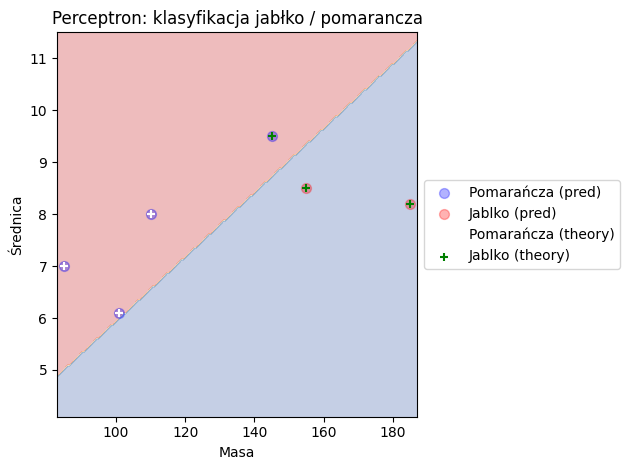

In [30]:
plot_decision_boundary(
    X_test, y_test, p,
    xlabel="Masa",
    ylabel="Średnica",
    title="Perceptron: klasyfikacja jabłko / pomarancza",
    legend=True,
    class_labels=("Pomarańcza", "Jablko")
)

Dlaczego tak się dzieje?

Perceptron szuka liniowej granicy decyzyjnej
Twój zbiór jabłka/pomarańcze ma dwie cechy: masa i średnica. Jeżeli klasy nie są idealnie liniowo separowalne, perceptron może się „pogubić”.

Dane testowe wychodzą poza obszar trenowania
W treningu miałeś jabłka w zakresie średnicy ~7–8.5, a w teście pojawia się jabłko z średnicą 9.5.
→ perceptron nie widział takich wartości i granica decyzyjna może je zaklasyfikować do złej klasy.

Brak normalizacji danych
Zauważ, że pierwsza cecha (masa) jest rzędu 100–200, a druga (średnica) tylko 6–9.
Perceptron liczy iloczyn skalarny, więc cecha o większej skali dominuje w uczeniu.
To powoduje, że średnica praktycznie nic nie wnosi, a decyzja zależy głównie od masy.

In [7]:
from sklearn.preprocessing import StandardScaler

# ----------------------
# Normalizacja cech
# ----------------------
scaler = StandardScaler()
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_train.max()

X_test_scaled

array([[0.80555556, 0.05277778],
       [0.86111111, 0.04722222],
       [1.02777778, 0.04555556],
       [0.47222222, 0.03888889],
       [0.56111111, 0.03388889],
       [0.61111111, 0.04444444]])

Predykcje: [1 1 1 0 0 0]


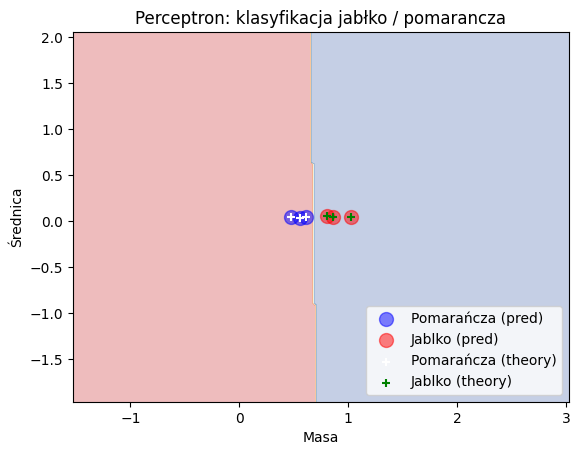

In [9]:
# ----------------------
# Trening perceptronu
# ----------------------
p = Perceptron(learning_rate=0.02, epochs=20)
p.fit(X_train_scaled, y_train)

# ----------------------
# Predykcja
# ----------------------
preds = p.predict(X_test_scaled)
print("Predykcje:", preds)




plot_decision_boundary(
    X_test_scaled, y_test, p,
    xlabel="Masa",
    ylabel="Średnica",
    title="Perceptron: klasyfikacja jabłko / pomarancza",
    legend=True,
    class_labels=("Pomarańcza", "Jablko")
)


## Ćwiczenie

Zastosuj model perceptronu do określenia, czy dana osoba ma **prawidłową wagę** czy **nadwagę**.

Do klasyfikacji wykorzystamy wskaźnik BMI (Body Mass Index), obliczany według wzoru:

$$
BMI = \frac{\text{waga [kg]}}{(\text{wzrost [m]})^2}
$$

Przyjmujemy kryterium:

* **BMI < 25 → waga prawidłowa**
* **BMI ≥ 25 → nadwaga**

Oczywiście wystarczyłoby samo obliczanie BMI, aby przypisać etykiety.
My jednak chcemy nauczyć perceptron rozpoznawania nadwagi **tylko na podstawie danych wejściowych: wzrostu i wagi**. Dzięki znajomości wzoru na BMI możemy sprawdzić, jak dobrze model nauczył się tego zadania.

Poniżej podane są dane wejściowe. Na ich podstawie oblicz BMI, przygotuj odpowiednie etykiety (`0` – waga prawidłowa, `1` – nadwaga), a następnie wykorzystaj je do trenowania perceptronu.

Materiały do ćwiczenia: [dane](wzrost_waga.txt)


### Ogólniej

1. **Propagacja w przód (forward pass)**  
   Dane wejściowe przechodzą przez kolejne warstwy sieci.  
   Każdy neuron oblicza sumę ważoną swoich wejść ($z = w·x + b$), a następnie przepuszcza wynik przez funkcję aktywacji.  
   W ten sposób powstaje coraz bardziej abstrakcyjna reprezentacja danych, aż do warstwy wyjściowej, która generuje **predykcję** (np. klasę, prawdopodobieństwa, wartość liczbową).

2. **Ocena jakości (loss function - funkcja straty)**  
   Predykcja jest porównywana z oczekiwanym wynikiem (tzw. etykietą (ang. _label_).  
   Funkcja straty mierzy różnicę między przewidywaniami a rzeczywistym wynikiem.  
   * Przykłady:  
     * regresja → MSE (Mean Squared Error),  
     * klasyfikacja binarna → binary cross-entropy,  
     * klasyfikacja wieloklasowa → categorical cross-entropy.

3. **Propagacja wsteczna (backpropagation)**  
   Na podstawie funkcji straty obliczane są gradienty błędu względem wag i biasów w każdej warstwie.  
   Działa tu **reguła łańcuchowa z rachunku różniczkowego** – błąd „cofa się” przez sieć od warstwy wyjściowej do wejściowej.  
   Dzięki temu wiemy, jak każda waga przyczyniła się do powstałego błędu.

4. **Aktualizacja wag (gradient descent)**  
   Optymalizator (np. **SGD**, **Adam**, **RMSProp**) zmienia wagi i biasy, przesuwając je w kierunku, który zmniejsza błąd.  
   Uczy się w ten sposób krok po kroku, minimalizując funkcję straty.  
   * Parametr **learning rate (krok uczenia)** kontroluje, jak duże są te zmiany.  
     Zbyt duży → model nie zbiega.  
     Zbyt mały → uczenie trwa bardzo długo.

5. **Iteracja w epokach**  
   Proces powtarza się dla wszystkich przykładów w zbiorze danych.  
   - Dane często dzielimy na **batch’e** (minipaczki), co pozwala szybciej i stabilniej uczyć duże modele.  
   - Po przejściu całego zbioru uczącego mówimy o jednej **epoce**.  
   - Uczenie trwa zwykle wiele epok, aż model osiągnie satysfakcjonującą jakość lub zatrzymamy je wcześniej (np. metodą **early stopping**).  

👉 W skrócie: sieć iteracyjnie **przewiduje → ocenia → poprawia swoje wagi**, aż stopniowo nauczy się odwzorowywać zależność między danymi wejściowymi a wyjściowymi.

## Gradient – podstawy

**Gradient** to kluczowe pojęcie w uczeniu sieci neuronowych i ogólnie w optymalizacji.  
Intuicyjnie: mówi, **w którą stronę i jak silnie trzeba zmienić parametry modelu, aby zmniejszyć błąd (funkcję straty)**.

---

### Co to jest gradient?

* Gradient to **wektor pochodnych cząstkowych** funkcji względem jej argumentów.  
  Jeśli mamy funkcję straty $L(w)$, zależną od wielu wag $w = (w_1, w_2, \dots, w_n)$, gradient wygląda tak:

$$
\nabla L(w) = 
\left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n} \right]
$$

* Każdy składnik gradientu mówi, jak bardzo zmieni się strata przy niewielkiej zmianie danej wagi.  
* **Kierunek gradientu** wskazuje najszybszy wzrost funkcji.  
  Dlatego w uczeniu maszynowym idziemy w przeciwnym kierunku (tzw. *gradient descent*), aby minimalizować stratę.

---

### Jak oblicza się gradient?

1. **Pojedynczy neuron**  
   Neuron:  
   \[
   z = w \cdot x + b, \quad a = \sigma(z)
   \]
   gdzie \(\sigma\) to funkcja aktywacji.  
   Strata (np. dla jednej próbki):  
   \[
   L = \frac{1}{2} (a - y)^2
   \]

   Aby policzyć gradient względem \(w\):  
   \[
   \frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
   \]

   Czyli **reguła łańcuchowa**: cofamy się od straty do wag, licząc kolejne pochodne.

2. **Cała sieć**  
   W sieci neuronowej obliczamy gradienty wag w każdej warstwie stosując algorytm **propagacji wstecznej (backpropagation)**.  
   Polega on na:
   * obliczeniu błędu w warstwie wyjściowej,
   * cofnięciu się krok po kroku wstecz, używając reguły łańcuchowej,
   * wyliczeniu, jak każda waga wpłynęła na błąd.

---

### Dlaczego gradient jest tak ważny?

* Gradient mówi nam, jak poprawiać parametry, aby **zmniejszać błąd**.  
* To fundament wszystkich algorytmów optymalizacji: **SGD, Adam, RMSProp** itp.  
* Bez gradientu nie dałoby się uczyć głębokich sieci neuronowych, bo nie wiedzielibyśmy, w którą stronę aktualizować wagi.

---

### Intuicja geometryczna

* Dla funkcji jednej zmiennej gradient to zwykła pochodna → nachylenie wykresu.  
* Dla wielu zmiennych gradient to wektor, który wskazuje kierunek najszybszego wzrostu.  
* W uczeniu sieci: chcemy znaleźć **minimum globalne lub lokalne** funkcji straty, więc idziemy w kierunku **przeciwnym do gradientu**.

---

### Podsumowanie

* Gradient = wektor pochodnych cząstkowych funkcji straty względem wag.  
* Obliczany za pomocą reguły łańcuchowej (backpropagation).  
* Umożliwia uczenie się sieci poprzez **iteracyjne zmniejszanie funkcji straty**.  
* Intuicyjnie: gradient mówi, jak zmienić parametry modelu, aby „zejść w dół” na wykresie błędu i poprawić predykcję.

---


## Kluczowe pojęcia

* **Bias–variance tradeoff**  
  Równowaga między prostotą modelu a jego złożonością:  
  * duży **bias** → model zbyt prosty, ryzyko niedouczenia (*underfitting*),  
  * duża **wariancja** → model zbyt złożony, ryzyko przeuczenia (*overfitting*).  
  Celem jest znalezienie punktu pośredniego, w którym model dobrze generalizuje na nowych danych.

* **Regularizacja**  
  Zestaw technik ograniczających przeuczenie (*overfitting*):  
  * **L1/L2 (ridge, lasso)** – kary za duże wagi, co „wygładza” model,  
  * **Dropout** – losowe wyłączanie części neuronów w trakcie uczenia,  
  * **Early stopping** – zatrzymanie treningu, gdy dokładność na zbiorze walidacyjnym przestaje się poprawiać.  

* **Batch i epoch**  
  * **Batch** – porcja danych uczących, na której wykonywana jest jedna aktualizacja wag,  
  * **Mini-batch** – najczęściej stosowana forma (np. 32, 64 przykłady na batch),  
  * **Epoch** – jedno pełne przejście przez cały zbiór danych.  
  Dzięki batchom uczenie jest bardziej wydajne i stabilne numerycznie.

* **Uczenie nadzorowane vs. nienadzorowane**  
  * **Nadzorowane** – dane wejściowe mają etykiety (np. zdjęcia + klasy obiektów); model uczy się przewidywać znane wyjścia.  
  * **Nienadzorowane** – brak etykiet; model sam szuka struktury w danych (np. grupowanie, redukcja wymiarów).

* **Uczenie półnadzorowane i samonadzorowane**  
  Pośrednie podejścia:  
  * **Półnadzorowane** – część danych ma etykiety, część nie (np. etykietowanie tylko fragmentu zbioru),  
  * **Samonadzorowane** – model uczy się z samych danych, np. przewidując brakujące fragmenty (często stosowane w NLP i wizji komputerowej).

* **Overfitting i underfitting**  
  * **Underfitting** – model za prosty, nie uczy się dobrze nawet na zbiorze treningowym,  
  * **Overfitting** – model dopasowany zbyt mocno do danych treningowych, traci zdolność generalizacji na nowych danych.  
  W praktyce stosuje się techniki regularizacji, walidację krzyżową i odpowiedni dobór architektury, aby tego uniknąć.

* **Walidacja i testowanie**  
  Dane dzieli się na:  
  * **Zbiór treningowy** – do uczenia,  
  * **Zbiór walidacyjny** – do strojenia hiperparametrów i kontroli przeuczenia,  
  * **Zbiór testowy** – do ostatecznej oceny jakości modelu.  

* **Learning rate (krok uczenia)**  
  Określa, jak duże kroki wykonuje optymalizator podczas aktualizacji wag.  
  Zbyt duży → model się nie uczy (oscyluje),  
  Zbyt mały → uczy się bardzo wolno.  
  Często stosuje się techniki adaptacyjne (Adam, RMSProp) lub harmonogramy uczenia (learning rate schedule).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dane ---
x = 2        # wejście
y = 5        # prawdziwa etykieta

# Parametry początkowe
w = 1.0
b = 0.0
lr = 0.1     # learning rate

# --- Forward pass ---
z = w * x + b
y_hat = z
L = 0.5 * (y_hat - y) ** 2

# --- Gradienty ---
dL_dyhat = (y_hat - y)
dL_dw = dL_dyhat * x
dL_db = dL_dyhat * 1

# --- Aktualizacja ---
w_new = w - lr * dL_dw
b_new = b - lr * dL_db

# --- Wykres funkcji straty względem w ---
w_values = np.linspace(-1, 4, 200)
loss_values = [0.5 * ((w_i * x + b) - y) ** 2 for w_i in w_values]

plt.figure(figsize=(7,5))
plt.plot(w_values, loss_values, label="Funkcja straty L(w)")

# Punkt początkowy
plt.scatter(w, L, color="red", s=80, label=f"Start (w={w}, L={L:.2f})")

# Punkt po aktualizacji
L_new = 0.5 * ((w_new * x + b_new) - y) ** 2
plt.scatter(w_new, L_new, color="green", s=80, label=f"Po kroku GD (w={w_new:.2f})")

# Strzałka ruchu gradient descent
plt.arrow(w, L, w_new - w, L_new - L,
          head_width=0.1, head_length=0.2, fc="black", ec="black")

plt.xlabel("w")
plt.ylabel("L(w)")
plt.title("Jeden krok gradient descent")
plt.legend()
plt.grid(True)
plt.show()


## Czym jest Deep Learning

Deep learning (głębokie uczenie) to gałąź uczenia maszynowego, 
w której model uczy się reprezentacji danych poprzez wiele warstw 
przekształceń. W praktyce oznacza to trenowanie głębokich sieci 
neuronowych na dużych zbiorach danych, aby automatycznie wydobywać 
cechy i wzorce potrzebne do klasyfikacji, regresji czy generowania.


## Anatomia sztucznej sieci neuronowej

- **Neuron**: prosta funkcja licząca zsumowane wejścia, 
  ważona parametrami (wagami) i przesunięciem (biasem), 
  a następnie przepuszczająca wynik przez nieliniową funkcję aktywacji.
- **Warstwa**: zbiór neuronów przetwarzających równolegle ten sam 
  wektor wejściowy. Warstwy ukryte pozwalają modelowi budować hierarchię 
  reprezentacji (np. z pikseli → krawędzie → kształty).
- **Głębokość**: liczba kolejnych warstw, które dane muszą przejść. 
  Im więcej warstw, tym bardziej złożone zależności można uchwycić, 
  choć rośnie koszt obliczeń i ryzyko przeuczenia.


## Jak przebiega uczenie

1. **Forward pass**: dane wejściowe przechodzą kolejno przez warstwy, 
   aż do prognozy na wyjściu.
2. **Funkcja straty**: porównuje prognozę z oczekiwaną etykietą 
   i wylicza skalarny błąd.
3. **Backpropagation**: oblicza pochodne funkcji straty względem każdej 
   wagi, cofając się warstwa po warstwie (reguła łańcuchowa).
4. **Aktualizacja**: optymalizator (np. SGD, Adam) modyfikuje wagi, 
   aby zmniejszyć błąd w kolejnych iteracjach.
5. **Pętla treningowa**: kroki 1-4 powtarzamy dla wielu przykładów i epok, 
   stopniowo poprawiając wyniki modelu.


In [ ]:
import torch
from torch import nn

# Minimalny przykład: klasyfikacja binarna przy użyciu perceptronu
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Przykładowe dane (XOR, dla ilustracji)
inputs = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
targets = torch.tensor([[0.], [1.], [1.], [0.]])

for epoch in range(2000):
    preds = model(inputs)
    loss = criterion(preds, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Przykładowa strata:', loss.item())


## Kiedy sięgać po deep learning

- Gdy dysponujemy dużą ilością danych i ciężko ręcznie zaprojektować 
  cechy opisujące problem (np. obraz, dźwięk, tekst).
- Gdy tradycyjne modele płytkie (np. regresje, drzewa) nie osiągają 
  satysfakcjonujących wyników.
- Gdy ważna jest możliwość dalszego ulepszania modelu dzięki 
  transfer learningowi lub dopasowaniu architektury (CNN, RNN, 
  transformatory).
- Zawsze pamiętaj o walidacji i monitorowaniu, ponieważ 
  głębokie modele są wrażliwe na jakość danych i dobór hiperparametrów.
